# 2110446 Data Science and Data Engineering
# Preparing and Cleaning Data for Machine Learning

Credit: https://www.dataquest.io/blog/machine-learning-preparing-data/

![](https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/code/week2_dataprep/loanpre-thumbnail-credit.png)

First, lets import some of the libraries that we'll be using, and set some parameters to make the output easier to read.

# 1) Examining the Data Set
Lending Club periodically releases data for all the approved and declined loan applications on their website. So you're working with the same data we are, we've mirrored the data on data.world. You can select different year ranges to download the dataset (in CSV format) for both approved and declined loans.

You'll also find a data dictionary (in XLS format), towards the bottom of the page, which contains information on the different column names. The data dictionary is useful to help understand what a column represents in the dataset.

The data dictionary contains two sheets:

LoanStats sheet: describes the approved loans dataset
RejectStats sheet: describes the rejected loans dataset
We'll be using the LoanStats sheet since we're interested in the approved loans dataset.

The approved loans dataset contains information on current loans, completed loans, and defaulted loans. For this challenge, we'll be working with approved loans data for the years 2007 to 2011.

First, lets import some of the libraries that we'll be using, and set some parameters to make the output easier to read.

In [47]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

## Loading The Data Into Pandas

We've downloaded our dataset and named it lending_club_loans.csv, but now we need to load it into a pandas DataFrame to explore it.

To ensure that code run fast for us, we need to reduce the size of lending_club_loans.csv by doing the following:

Remove the first line: It contains extraneous text instead of the column titles. This text prevents the dataset from being parsed properly by the pandas library.
Remove the 'desc' column: it contains a long text explanation for the loan.
Remove the 'url' column: it contains a link to each on Lending Club which can only be accessed with an investor account.
Removing all columns with more than 50% missing values: This allows us to move faster since don't need to spend time trying to fill these values.
We'll also name the filtered dataset loans_2007 and later at the end of this section save it as loans_2007.csv to keep it separate from the raw data. This is good practice and makes sure we have our original data in case we need to go back and retrieve any of the original data we're removing.

Now, let's go ahead and perform these steps:

In [48]:
# skip row 1 so pandas can parse the data properly.
loans_2007 = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/lending_club_loans.csv', low_memory=False) 
print (loans_2007.shape)
half_count = len(loans_2007) / 2
print(half_count)

loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
print (loans_2007.shape)

loans_2007 = loans_2007.drop(['url','desc'],axis=1)      # These columns are not useful for our purposes
print (loans_2007.shape)

(42538, 115)
21269.0
(42538, 58)
(42538, 56)


## Let's use the pandas head() method 
to display first three rows of the loans_2007 DataFrame, just to make sure we were able to load the dataset properly:

In [49]:
loans_2007.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,False,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,False,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,False,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,False,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,False,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,False,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False


In [50]:
loans_2007.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,42506.000000,42506.000000,4.253500e+04,42445.000000,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42506.000000,41170.000000
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,0.121650,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,9.343951,0.058156,1.429786e+04,0.491172,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.143039,0.045227
std,2.795409e+05,7410.938391,7146.914675,7131.686447,0.037079,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,4.496274,0.245713,2.201844e+04,0.283643,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,29.359579,0.208737
min,7.047300e+04,500.000000,500.000000,0.000000,0.054200,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,0.096300,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,6.000000,0.000000,3.635000e+03,0.257000,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.000000,0.000000
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,0.119900,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,1.000000,9.000000,0.000000,8.821000e+03,0.497000,20.000000,0.000000,0.000000,9680.084710,8955.040000,8000.000000,1339.160000,0.000000,0.000000,0.000000,527.930000,699.000000,695.000000,0.000000,0.000000
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,0.147200,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,2.000000,12.000000,0.000000,1.725100e+04,0.727000,29.000000,0.000000,0.000000,16421.755103,15525.180000,13425.000000,2802.950000,0.000000,0.000000,0.000000,3170.220000,744.000000,740.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,33.000000,47.000000,5.000000,1.207359e+06,1.190000,90.000000,3555.850000,3553.300000,58563.679929,58563.680000,35000.020000,23823.750000,209.000000,29623.350000,7002.190000,36115.200000,850.000000,845.000000,6053.000000,2.000000


## Let's also use pandas .shape attribute 
to view the number of samples and features we're dealing with at this stage:

In [51]:
loans_2007.shape

(42538, 56)

# 2) Narrowing down our columns
It's a great idea to spend some time to familiarize ourselves with the columns in the dataset, to understand what each feature represents. This is important, because a poor understanding of the features could cause us to make mistakes in the data analysis and the modeling process.

We'll be using the data dictionary Lending Club provided to help us become familiar with the columns and what each represents in the dataset. To make the process easier, we'll create a DataFrame to contain the names of the columns, data type, first row's values, and description from the data dictionary.

To make this easier, we've pre-converted the data dictionary from Excel format to a CSV.

In [52]:
data_dictionary = pd.read_csv('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/DataPreparation_toStudent/Lab1_LoansDataSet/dataset/LCDataDictionary.csv') # Loading in the data dictionary
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

117
['LoanStatNew', 'Description']


In [53]:
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name','Description': 'description'})
print(data_dictionary)

                      name  \
0           acc_now_delinq   
1     acc_open_past_24mths   
2               addr_state   
3                 all_util   
4               annual_inc   
..                     ...   
112    verification_status   
113  verified_status_joint   
114               zip_code   
115                    NaN   
116                    NaN   

                                                                                                            description  
0                                                       The number of accounts on which the borrower is now delinquent.  
1                                                                            Number of trades opened in past 24 months.  
2                                                            The state provided by the borrower in the loan application  
3                                                                                 Balance to credit limit on all trades  
4                            

## Now that we've got the data dictionary loaded.
Let's join the first row of loans_2007 to the data_dictionary DataFrame to give us a preview DataFrame with the following columns:

name — contains the column names of loans_2007.
dtypes — contains the data types of the loans_2007 columns.
first value — contains the values of loans_2007 first row.
description — explains what each column in loans_2007 

In [54]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
#print (loans_2007_dtypes)
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

loans_2007_dtypes['first value'] = loans_2007.loc[0].values
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [55]:
preview.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.


When we printed the shape of loans_2007 earlier, we noticed that it had 56 columns which also means this preview DataFrame has 56 rows. It can be cumbersome to try to explore all the rows of preview at once, so instead we'll break it up into three parts and look at smaller selection of features each time.

As you explore the features to better understand each of them, you'll want to pay attention to any column that:

leaks information from the future (after the loan has already been funded),
don't affect the borrower's ability to pay back the loan (e.g. a randomly generated ID value by Lending Club),
is formatted poorly,
requires more data or a lot of preprocessing to turn into useful a feature, or
contains redundant information.
I'll say it again to emphasize it because it's important: We need to especially pay close attention to data leakage, which can cause the model to overfit. This is because the model would be also learning from features that wouldn't be available when we're using it make predictions on future loans.

First Group Of Columns
Let's display the first 19 rows of preview and analyze them:

In [56]:
preview[:19] 

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,0.1065,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


After analyzing the columns, we can conclude that the following features can be removed:

id — randomly generated field by Lending Club for unique identification purposes only.
member_id — also randomly generated field by Lending Club for identification purposes only.
funded_amnt — leaks information from the future(after the loan is already started to be funded).
funded_amnt_inv — also leaks data from the future.
sub_grade — contains redundant information that is already in the grade column (more below).
int_rate — also included within the grade column.
emp_title — requires other data and a lot of processing to become potentially useful
issued_d — leaks data from the future.
Lending Club uses a borrower's grade and payment term (30 or months) to assign an interest rate (you can read more about Rates & Fees). This causes variations in interest rate within a given grade. But, what may be useful for our model is to focus on clusters of borrowers instead of individuals. And, that's exactly what grading does - it segments borrowers based on their credit score and other behaviors, which is we should keep the grade column and drop interest int_rate and sub_grade.

Let's drop these columns from the DataFrame before moving onto to the next group of columns.

In [57]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)

Second Group Of Columns
Let's move on to the next 19 columns:

In [58]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0.0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735.0,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739.0,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1.0,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3.0,The number of open credit lines in the borrower's credit file.


In this group,take note of the fico_range_low and fico_range_high columns. Both are in this second group of columns but because they related to some other columns, we'll talk more about them after looking at the last group of columns.

We can drop the following columns:

zip_code - mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.
out_prncp - leaks data from the future.
out_prncp_inv - also leaks data from the future.
total_pymnt - also leaks data from the future.
total_pymnt_inv - also leaks data from the future.
Let's go ahead and remove these 5 columns from the DataFrame:

In [59]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

Third Group Of Columns
Let's analyze the last group of features:

In [60]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000.0,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0.0,Late fees received to date
41,recoveries,float64,0.0,post charge off gross recovery
42,collection_recovery_fee,float64,0.0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744.0,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740.0,The lower boundary range the borrower’s last FICO pulled belongs to.


In this last group of columns, we need to drop the following, all of which leak data from the future:

total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
Let's drop our last group of columns:

In [61]:
drop_cols = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt']

loans_2007 = loans_2007.drop(drop_cols, axis=1)
print (loans_2007.shape)

(42538, 36)


## Investigating FICO Score Columns
Now, besides the explanations provided here in the Description column,let's learn more about fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high.

FICO scores are a credit score, or a number used by banks and credit cards to represent how credit-worthy a person is. While there are a few types of credit scores used in the United States, the FICO score is the best known and most widely used.

When a borrower applies for a loan, Lending Club gets the borrowers credit score from FICO - they are given a lower and upper limit of the range that the borrowers score belongs to, and they store those values as fico_range_low, fico_range_high. After that, any updates to the borrowers score are recorded as last_fico_range_low, and last_fico_range_high.

A key part of any data science project is to do everything you can to understand the data. While researching this data set, I found a project done in 2014 by a group of students from Stanford University on this same dataset.

In the report for the project, the group listed the current credit score (last_fico_range) among late fees and recovery fees as fields they mistakenly added to the features but state that they later learned these columns all leak information into the future.

However, following this group's project, another group from Stanford worked on this same Lending Club dataset. They used the FICO score columns, dropping only last_fico_range_low, in their modeling. This second group's report described last_fico_range_high as the one of the more important features in predicting accurate results.

The question we must answer is, do the FICO credit scores information into the future? Recall a column is considered leaking information when especially it won't be available at the time we use our model - in this case when we use our model on future loans.

This blog examines in-depth the FICO scores for lending club loans, and notes that while looking at the trend of the FICO scores is a great predictor of whether a loan will default, that because FICO scores continue to be updated by the Lending Club after a loan is funded, a defaulting loan can lower the borrowers score, or in other words, will leak data.

Therefore we can safely use fico_range_low and fico_range_high, but not last_fico_range_low, and last_fico_range_high. Lets take a look at the values in these columns:

In [62]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


## Let's get rid of the missing values, then plot histograms to look at the ranges of the two columns:

42538
42535


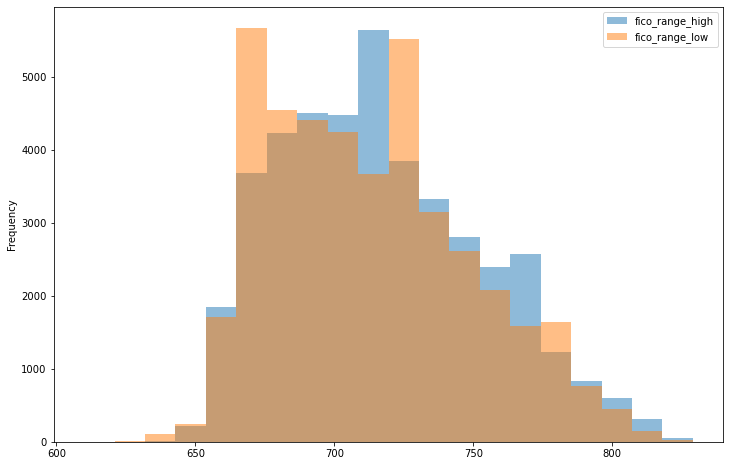

In [63]:
fico_columns = ['fico_range_high','fico_range_low']

print(loans_2007.shape[0])
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape[0])

loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20);

## Let's now go ahead and create a column for the average of fico_range_low and fico_range_high columns and name it fico_average. 
Note that this is not the average FICO score for each borrower, but rather an average of the high and low range that we know the borrower is in.

In [64]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2

In [65]:
# Let's check what we just did.

In [66]:
cols = ['fico_range_low','fico_range_high']
loans_2007[cols].head()

,fico_range_low,fico_range_high
0,735.0,739.0
1,740.0,744.0
2,735.0,739.0
3,690.0,694.0
4,695.0,699.0


## Good! We got the mean calculations and everything right. 
Now, we can go ahead and drop fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high columns.

In [67]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low',
             'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape

(42535, 33)

Notice just by becoming familiar with the columns in the dataset, we're able to reduce the number of columns from 56 to 33.

## Decide On A Target Column
Now, let's decide on the appropriate column to use as a target column for modeling - keep in mind the main goal is predict who will pay off a loan and who will default.

We learned from the description of columns in the preview DataFrame that loan_status is the only field in the main dataset that describe a loan status, so let's use this column as the target column.

In [68]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


Currently, this column contains text values that need to be converted to numerical values to be able use for training a model.

Let's explore the different values in this column and come up with a strategy for converting the values in this column. We'll use the DataFrame method value_counts() to return the frequency of the unique values in the loan_status column.

In [69]:
loans_2007["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

The loan status has nine different possible values!

Let's learn about these unique values to determine the ones that best describe the final outcome of a loan, and also the kind of classification problem we'll be dealing with.

You can read about most of the different loan statuses on the Lending Club website as well as these posts on the Lend Academy and Orchard forums. I have pulled that data together in a table below so we can see the unique values, their frequency in the dataset and what each means:

In [70]:
meaning = [
    "Loan has been fully paid off.",
    "Loan for which there is no longer a reasonable expectation of further payments.",
    "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "Loan is up to date on current payments.",
    "The loan is past due but still in the grace period of 15 days.",
    "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
    "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
    "Loan is defaulted on and no payment has been made for more than 121 days."]

status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values

loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


Remember, our goal is to build a machine learning model that can learn from past loans in trying to predict which loans will be paid off and which won't. From the above table, only the Fully Paid and Charged Off values describe the final outcome of a loan. The other values describe loans that are still on going, and even though some loans are late on payments, we can't jump the gun and classify them as Charged Off.

Also, while the Default status resembles the Charged Off status, in Lending Club's eyes, loans that are charged off have essentially no chance of being repaid while default ones have a small chance. Therefore, we should use only samples where the loan_status column is 'Fully Paid' or 'Charged Off'.

We're not interested in any statuses that indicate that the loan is ongoing or in progress, because predicting that something is in progress doesn't tell us anything.

Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as binary classification.

Let's remove all the loans that don't contain either 'Fully Paid' or 'Charged Off' as the loan's status and then transform the 'Fully Paid' values to 1 for the positive case and the 'Charged Off' values to 0 for the negative case.

This will mean that out of the ~42,000 rows we have, we'll be removing just over 3,000.

There are few different ways to transform all of the values in a column, we'll use the DataFrame method replace().


In [71]:
loans_2007 = loans_2007[(loans_2007["loan_status"] == "Fully Paid") |
                            (loans_2007["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans_2007 = loans_2007.replace(mapping_dictionary)

In [72]:
print(loans_2007.shape)

(39239, 33)


## Visualizing the Target Column Outcomes

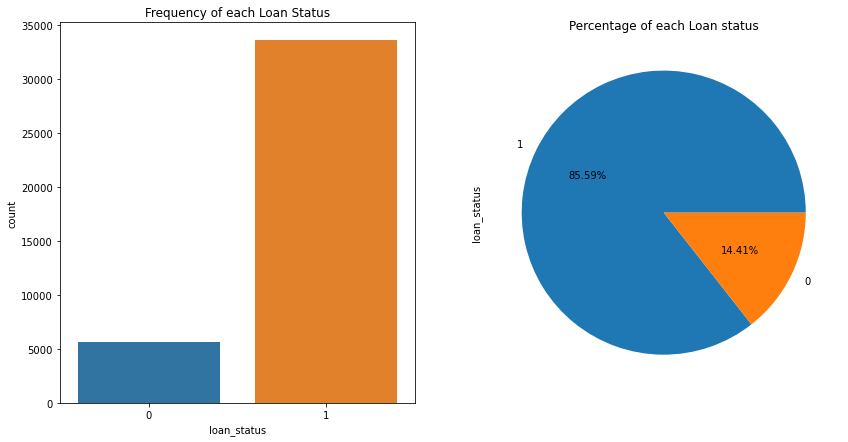

In [73]:
filtered_loans = pd.read_csv('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/DataPreparation_toStudent/Lab1_LoansDataSet/dataset/filtered_loans.csv')
filtered_loans.head(3)
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
filtered_loans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

These plots indicate that a significant number of borrowers in our dataset paid off their loan - 85.62% of loan borrowers paid off amount borrowed, while 14.38% unfortunately defaulted. From our loan data it is these 'defaulters' that we're more interested in filtering out as much as possible to reduce loses on investment returns.

## Remove Columns with only One Value
To wrap up this section, let's look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns we'll need to explore further in the next stage.

The pandas Series method nunique() returns the number of unique values, excluding any null values. We can use apply this method across the dataset to remove these columns in one easy step.



In [74]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

Again, there may be some columns with more than one unique values but one of the values has insignificant frequency in the dataset. Let's find out and drop such column(s):

In [75]:
print(loans_2007.shape)

(39239, 25)


In [76]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_status, dtype: int64

False    39238
True         1
Name: pymnt_plan, dtype: int64



## The payment plan column (pymnt_plan) has two unique values, 'y' and 'n', with 'y' occurring only once. Let's drop this column:

In [77]:
print(loans_2007.shape[1])
loans_2007 = loans_2007.drop('pymnt_plan', axis=1)
print("We've been able to reduced the features to => {}".format(loans_2007.shape[1]))

25
We've been able to reduced the features to => 24


Lastly, lets save our work in this section to a CSV file.

In [78]:
loans_2007.to_csv("filtered_loans_2007.csv",index=False)

# 3) Preparing the Features for Machine Learning
In this section, we'll prepare the filtered_loans_2007.csv data for machine learning. We'll focus on handling missing values, converting categorical columns to numeric columns and removing any other extraneous columns.

We need to handle missing values and categorical features before feeding the data into a machine learning algorithm, because the mathematics underlying most machine learning models assumes that the data is numerical and contains no missing values. To reinforce this requirement, scikit-learn will return an error if you try to train a model using data that contain missing values or non-numeric values when working with models like linear regression and logistic regression.

Here's an outline of what we'll be doing in this stage:

Handle Missing Values
Investigate Categorical Columns
Convert Categorical Columns To Numeric Features
Map Ordinal Values To Integers
Encode Nominal Values As Dummy Variables
First though, let's load in the data from last section's final output:



In [79]:
filtered_loans = pd.read_csv('filtered_loans_2007.csv')
print(filtered_loans.shape)
filtered_loans.head()

(39239, 24)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,0.837,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,0.094,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,0.985,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,0.210,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,0.283,12.0,Jan-2016,0.0,732.0


## Handle Missing Values
Let's compute the number of missing values and determine how to handle them. We can return the number of missing values across the DataFrame by:

First, use the Pandas DataFrame method isnull() to return a DataFrame containing Boolean values:
True if the original value is null
False if the original value isn't null
Then, use the Pandas DataFrame method sum() to calculate the number of null values in each column.

In [80]:
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_average               0
dtype: int64


Notice while most of the columns have 0 missing values, title has 9 missing values, revol_util has 48, and pub_rec_bankruptcies contains 675 rows with missing values. Let's remove columns entirely where more than 1% (392) of the rows for that column contain a null value. In addition, we'll remove the remaining rows containing null values, which means we'll lose a bit of data, but in return keep some extra features to use for prediction.

This means that we'll keep the title and revol_util columns, just removing rows containing missing values, but drop the pub_rec_bankruptcies column entirely since more than 1% of the rows have a missing value for this column.

Here's a list of steps we can use to achieve that:

Use the drop method to remove the pub_rec_bankruptcies column from filtered_loans.
Use the dropna method to remove all rows from filtered_loans containing any missing values.

In [81]:
print(filtered_loans.shape)
filtered_loans = filtered_loans.drop("pub_rec_bankruptcies",axis=1)
print(filtered_loans.shape)

filtered_loans = filtered_loans.dropna()
print(filtered_loans.shape)

(39239, 24)
(39239, 23)
(38123, 23)


Next, we'll focus on the categorical columns.

## Investigate Categorical Columns
Keep in mind, the goal in this section is to have all the columns as numeric columns (int or float data type), and containing no missing values. We just dealt with the missing values, so let's now find out the number of columns that are of the object data type and then move on to process them into numeric form.

In [82]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
float64    12
object     10
int64       1
dtype: int64


In [83]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


In [84]:
#filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state','last_credit_pull_d']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

grade :
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: grade, dtype: int64 

verification_status :
Not Verified       16391
Verified           12070
Source Verified     9662
Name: verification_status, dtype: int64 

emp_length :
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64 

term :
 36 months    28234
 60 months     9889
Name: term, dtype: int64 

addr_state :
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
SC     461
WI     433
OR     427
AL     42

In [85]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacation                349
educational             312
renewable_energy         95
Name: purpose, dtype: int64 

Unique Values in column: title

Debt Consolidation                2102
Debt Consolidation Loan           1635
Personal Loan                      632
Consolidation                      495
debt consolidation                 476
                                  ... 
Moving to Ohio for Grad School       1
Beam & Roof Loan                     1
Pay off that Discover Card           1
January 2010                         1
Almost There!                        1
Name: title, Length: 19021, dtype: int64 



In [86]:
# drop dates & large cardinality varibales
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

## Convert Categorical Columns to Numeric Features
First, let's understand the two types of categorical features we have in our dataset and how we can convert each to numerical features:

Ordinal values: these categorical values are in natural order. That's you can sort or order them either in increasing or decreasing order. For instance, we learnt earlier that Lending Club grade loan applicants from A to G, and assign each applicant a corresponding interest rate - grade A is less riskier while grade B is riskier than A in that order:
A < B < C < D < E < F < G ; where < means less riskier than
Nominal Values: these are regular categorical values. You can't order nominal values. For instance, while we can order loan applicants in the employment length column (emp_length) based on years spent in the workforce:
year 1 < year 2 < year 3 ... < year N,
we can't do that with the column purpose. It wouldn't make sense to say:

car < wedding < education < moving < house
These are the columns we now have in our dataset:

Ordinal Values
grade
emp_length
Nominal Values
_ home_ownership
verification_status
purpose
term
There are different approaches to handle each of these two types. In the steps following, we'll convert each of them accordingly.

To map the ordinal values to integers, we can use the pandas DataFrame method replace() to map both grade and emp_length to appropriate numeric values

In [87]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


Perfect! Let's move on to the Nominal Values. The approach to converting nominal features into numerical features is to encode them as dummy variables. The process will be:

Use pandas' get_dummies() method to return a new DataFrame containing a new column for each dummy variable
Use the concat() method to add these dummy columns back to the original DataFrame
Then drop the original columns entirely using the drop method
Lets' go ahead and encode the nominal columns that we now have in our dataset.

In [88]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(filtered_loans[nominal_columns], drop_first=False) 
filtered_loans_with_dummy_df = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans_with_dummy_df = filtered_loans_with_dummy_df.drop(nominal_columns, axis=1)
print(filtered_loans_with_dummy_df.shape)
#(38123, 39)
#(38123, 35) << get_dummies, drop_first=True

(38123, 39)


In [89]:
filtered_loans_with_dummy_df.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,737.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,0.094,4.0,742.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,737.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,692.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,732.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


To wrap things up, let's inspect our final output from this section to make sure all the features are of the same length, contain no null value, and are numericals.

Let's use pandas info method to inspect the filtered_loans DataFrame:

### Convert Categorical Columns to Numeric Features (OneHotEncoder)

Credit: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

Note: a one-hot encoding of y labels should use a LabelBinarizer instead.

In [90]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
enc_df = pd.DataFrame(enc.fit_transform(filtered_loans[nominal_columns]).toarray())
enc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38118,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38119,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38121,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
filtered_loans_with_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 0 to 39238
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38123 non-null  float64
 1   installment                          38123 non-null  float64
 2   grade                                38123 non-null  int64  
 3   emp_length                           38123 non-null  int64  
 4   annual_inc                           38123 non-null  float64
 5   loan_status                          38123 non-null  int64  
 6   dti                                  38123 non-null  float64
 7   delinq_2yrs                          38123 non-null  float64
 8   inq_last_6mths                       38123 non-null  float64
 9   open_acc                             38123 non-null  float64
 10  pub_rec                              38123 non-null  float64
 11  revol_bal                   

## Save to CSV
It is a good practice to store the final output of each section or stage of your workflow in a separate csv file. One of the benefits of this practice is that it helps us to make changes in our data processing flow without having to recalculate everything.

In [92]:
filtered_loans_with_dummy_df.to_csv("cleaned_loans_2007.csv",index=False)